# House Price Prediction

Designing an algorithm to accurately predict the house prices in Nigeria. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such.

In [1]:
#import important libraries
import numpy as np # for numerical purposes
import pandas as pd # for data modelling and manipulation
import matplotlib.pyplot as plt # to build charts
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
import warnings
import random
warnings.filterwarnings('ignore')
seed = 42

In [3]:
#Loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

# Exploratory Data Analysis

In [4]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_MILLIONS NAIRA)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [6]:
sub.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
train.shape, test.shape # to get number of columns and rows

((29451, 12), (68720, 11))

In [8]:
train.info() #So there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   POSTED_BY                        29451 non-null  object 
 1   UNDER_CONSTRUCTION               29451 non-null  int64  
 2   RERA                             29451 non-null  int64  
 3   BHK_NO.                          29451 non-null  int64  
 4   BHK_OR_RK                        29451 non-null  object 
 5   SQUARE_FT                        29451 non-null  float64
 6   READY_TO_MOVE                    29451 non-null  int64  
 7   RESALE                           29451 non-null  int64  
 8   ADDRESS                          29451 non-null  object 
 9   LONGITUDE                        29451 non-null  float64
 10  LATITUDE                         29451 non-null  float64
 11  TARGET(PRICE_IN_MILLIONS NAIRA)  29451 non-null  float64
dtypes: float64(4), int

In [9]:
test.info() #So there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [10]:
train.describe() #printing data statistical information

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_MILLIONS NAIRA)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [11]:
test.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,68720.000000,68720.000000,68720.000000,6.872000e+04,68720.000000,68720.000000,68720.000000,68720.000000
mean,0.176557,0.316531,2.388198,2.762419e+03,0.823443,0.933498,21.288045,76.919388
std,0.381296,0.465126,0.864577,1.640991e+05,0.381296,0.249159,6.179034,10.100950
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-38.391261,-118.354100
25%,0.000000,0.000000,2.000000,9.000310e+02,1.000000,1.000000,18.452663,73.798100
50%,0.000000,0.000000,2.000000,1.174982e+03,1.000000,1.000000,20.933260,77.324966
75%,0.000000,1.000000,3.000000,1.550265e+03,1.000000,1.000000,26.888396,78.000723
max,1.000000,1.000000,31.000000,4.016393e+07,1.000000,1.000000,65.183330,175.278040


Text(0.5, 0, '0:Not Under Construction, 1:Under Construction')

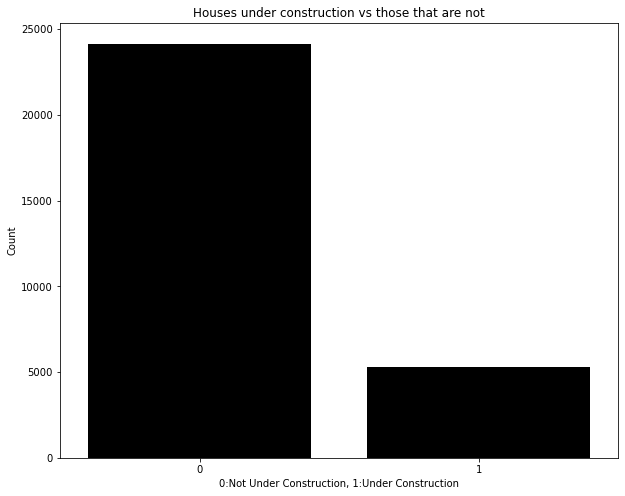

In [4]:
 plt.figure(figsize=(10,8))
sns.barplot(x=train['UNDER_CONSTRUCTION'].value_counts().index, y=train['UNDER_CONSTRUCTION'].value_counts(), color='black')
plt.title('Houses under construction vs those that are not')
plt.ylabel('Count')
plt.xlabel('0:Not Under Construction, 1:Under Construction')

Text(0.5, 0, 'RESALE')

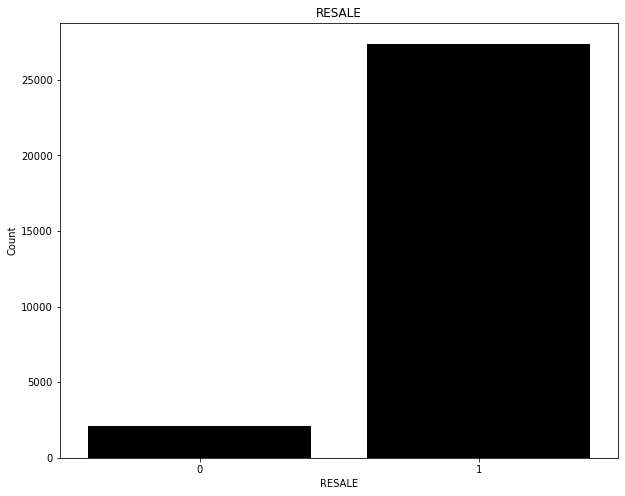

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x=train['RESALE'].value_counts().index, y=train['RESALE'].value_counts(), color='black')
plt.title('RESALE')
plt.ylabel('Count')
plt.xlabel('RESALE')

In [14]:
num_cols = ['TARGET(PRICE_IN_MILLIONS NAIRA)']

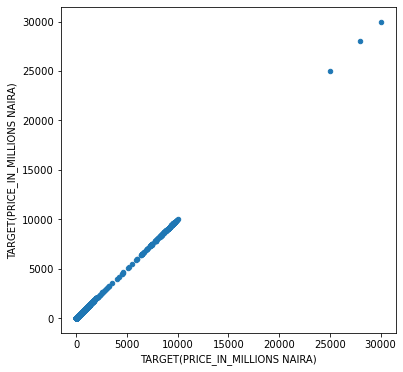

In [15]:
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    train.plot.scatter(x = col, y = 'TARGET(PRICE_IN_MILLIONS NAIRA)', ax = ax)


<AxesSubplot:>

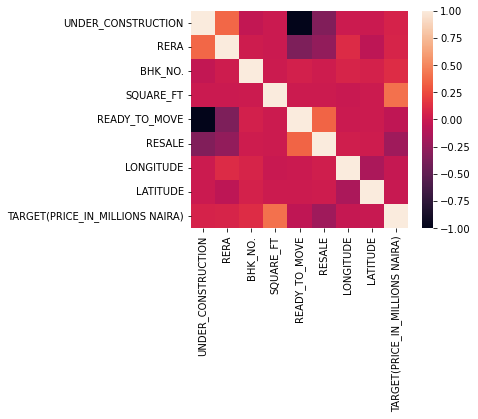

In [16]:
#CORRELATION MATRIX AMONG FEATURES
#plotting hearmap to find any high correlations between varaibles
corrmat = train.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

<AxesSubplot:xlabel='BHK_OR_RK', ylabel='count'>

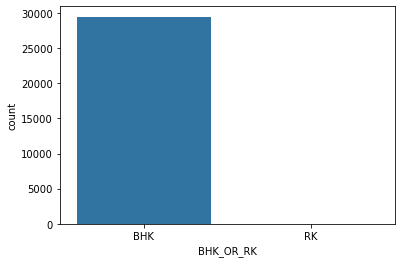

In [6]:
sns.countplot(train['BHK_OR_RK'])  # type of room

<AxesSubplot:xlabel='POSTED_BY', ylabel='count'>

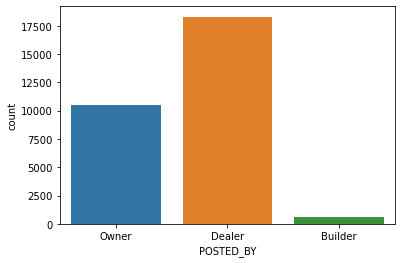

In [7]:
sns.countplot(train['POSTED_BY']) # posted by who

<AxesSubplot:xlabel='READY_TO_MOVE', ylabel='count'>

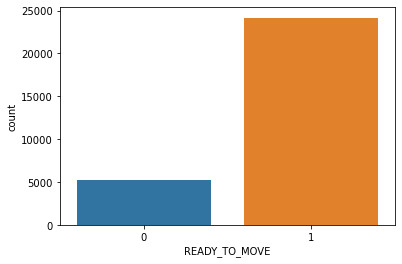

In [8]:
sns.countplot(train['READY_TO_MOVE'])

<AxesSubplot:xlabel='SQUARE_FT', ylabel='TARGET(PRICE_IN_MILLIONS NAIRA)'>

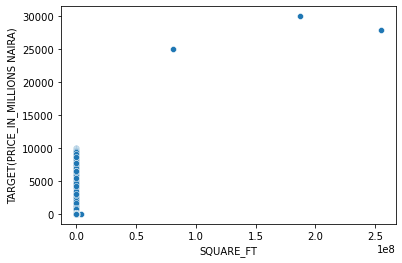

In [13]:
# using Scatterplot
# SQUARE_FT VS TARGET(PRICE_IN_LACS
sns.scatterplot(train['SQUARE_FT'], train['TARGET(PRICE_IN_MILLIONS NAIRA)'])

<AxesSubplot:xlabel='UNDER_CONSTRUCTION', ylabel='TARGET(PRICE_IN_MILLIONS NAIRA)'>

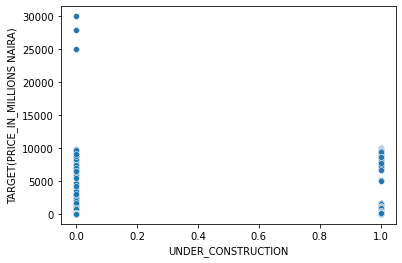

In [14]:
sns.scatterplot(train['UNDER_CONSTRUCTION'], train['TARGET(PRICE_IN_MILLIONS NAIRA)'])

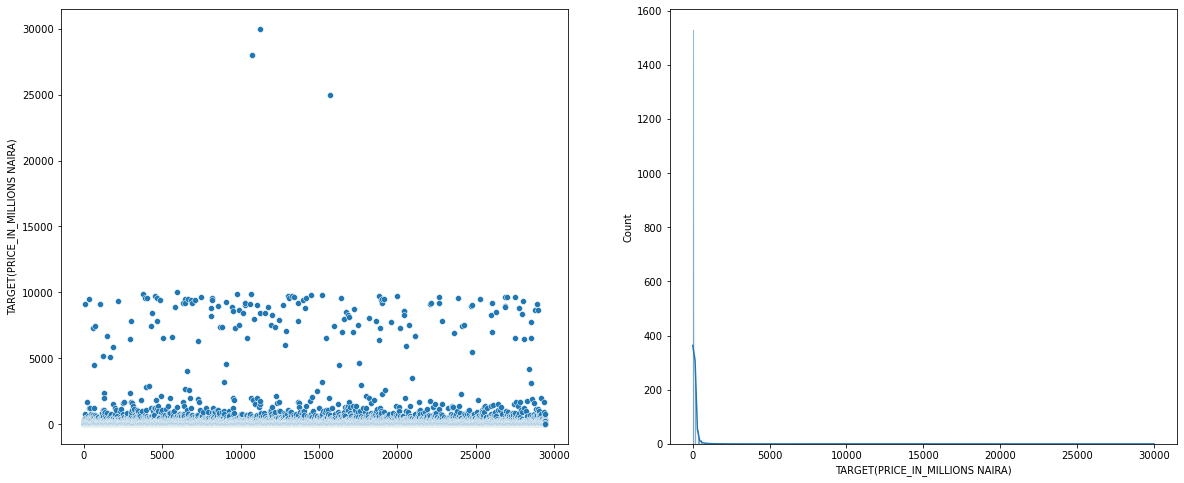

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(y = 'TARGET(PRICE_IN_MILLIONS NAIRA)', x = train.index, data=train, ax=ax[0])
sns.histplot(x='TARGET(PRICE_IN_MILLIONS NAIRA)', data=train, kde=True, ax=ax[1])
fig.show()

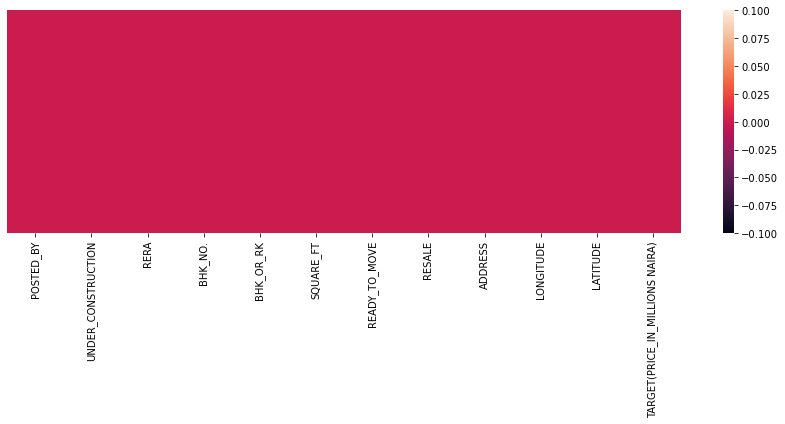

In [18]:
#see important features
plt.figure(figsize=(12,6))
sns.heatmap(train.isna(),yticklabels=False)
plt.tight_layout()

# Finding and Answering Questions (Q & A)

##  How much department's price that selled by Dealer, Owner, Builder ?

In [4]:

train.groupby('POSTED_BY').sum()['TARGET(PRICE_IN_MILLIONS NAIRA)']

POSTED_BY
Builder     152828.90
Dealer     3416296.67
Owner       639385.39
Name: TARGET(PRICE_IN_MILLIONS NAIRA), dtype: float64

<AxesSubplot:xlabel='POSTED_BY'>

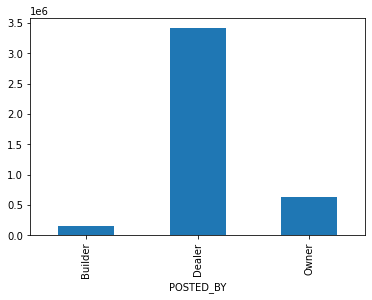

In [5]:
train.groupby('POSTED_BY').sum()['TARGET(PRICE_IN_MILLIONS NAIRA)'].plot.bar()

## How many Departments posted by Dealer, Owner, Builder ?

In [6]:
train['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

<AxesSubplot:>

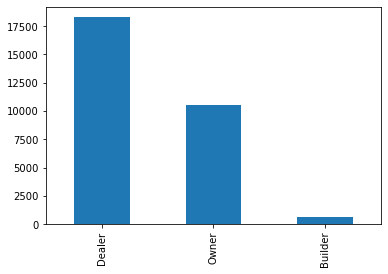

In [7]:
train['POSTED_BY'].value_counts().plot.bar()

## What is the mean price for every department accourding to the number of rooms ?

<AxesSubplot:xlabel='BHK_NO.'>

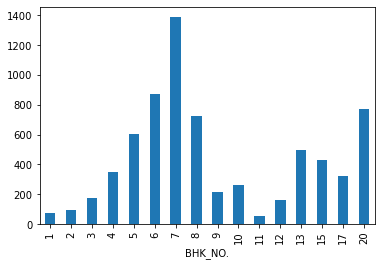

In [8]:
train.groupby('BHK_NO.').mean()['TARGET(PRICE_IN_MILLIONS NAIRA)'].plot.bar()

# Data Processing 

In [19]:
#Label encoding- so we can turn all categorical varialbles to numerial for train data
cat_features=["POSTED_BY", "BHK_OR_RK"]
             
for cat_feature in cat_features:
    train[f"{cat_feature}_cat"] = train[cat_feature].astype("category")
    train[f"{cat_feature}_cat"] = train[f"{cat_feature}_cat"].cat.codes

In [20]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_MILLIONS NAIRA),POSTED_BY_cat,BHK_OR_RK_cat
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,2,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,1,0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,2,0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,2,0
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,1,0


In [21]:
#Label encoding- so we can turn all categorical varialbles to numerial for train data
cat_features=["POSTED_BY", "BHK_OR_RK"]
             
for cat_feature in cat_features:
    test[f"{cat_feature}_cat"] = test[cat_feature].astype("category")
    test[f"{cat_feature}_cat"] = test[f"{cat_feature}_cat"].cat.codes

In [22]:
col_drop_list=[]

In [23]:
# We would drop ADDRESS but LAT and LoNG would give a good score

In [24]:
col_drop_list.append('ADDRESS')

In [25]:
train.drop(col_drop_list,axis=1,inplace=True)

In [26]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_MILLIONS NAIRA),POSTED_BY_cat,BHK_OR_RK_cat
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,2,0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,1,0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,2,0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,2,0
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,1,0


In [27]:
col_drop_list=[]

In [28]:
col_drop_list.append('POSTED_BY')

In [29]:
train.drop(col_drop_list,axis=1,inplace=True)

In [30]:
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_MILLIONS NAIRA),POSTED_BY_cat,BHK_OR_RK_cat
0,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,2,0
1,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,1,0
2,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,2,0
3,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,2,0
4,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,1,0


In [31]:
train.drop(['BHK_OR_RK'], axis=1, inplace=True)
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_MILLIONS NAIRA),POSTED_BY_cat,BHK_OR_RK_cat
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,2,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,2,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,2,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,1,0


In [32]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,POSTED_BY_cat,BHK_OR_RK_cat
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,2,0
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,1,0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,1,0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,1,0
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,2,0


In [33]:
test.drop(['BHK_OR_RK', 'POSTED_BY','BHK_OR_RK','ADDRESS'], axis=1, inplace=True)
test.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_cat,BHK_OR_RK_cat
0,0,0,1,545.171340,1,1,21.262000,73.047700,2,0
1,1,1,2,800.000000,0,0,18.966114,73.148278,1,0
2,0,0,2,1257.096513,1,1,22.592200,88.484911,1,0
3,0,0,3,1400.329489,1,1,26.988300,75.584600,1,0
4,0,0,1,430.477830,1,1,22.700000,72.870000,2,0


In [34]:
train.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_MILLIONS NAIRA),POSTED_BY_cat,BHK_OR_RK_cat
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,2,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,2,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,2,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,1,0


In [ ]:
#We dropped Posted_by and BHK because we alredy have Posted_by_cat when converting them to categorical variables

In [35]:
#visible changes in shape of the test and train data
print("Train Data shape: ",train.shape)
print("Test Data shape: ",test.shape)

Train Data shape:  (29451, 11)
Test Data shape:  (68720, 10)


In [36]:
target='TARGET(PRICE_IN_MILLIONS NAIRA)'
target

'TARGET(PRICE_IN_MILLIONS NAIRA)'

In [37]:
X=train.drop([target],axis=1)
y=train[[target]]
X.head(1)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_cat,BHK_OR_RK_cat
0,0,0,2,1300.236407,1,1,12.96991,77.59796,2,0


In [38]:
y.head(1)

,TARGET(PRICE_IN_MILLIONS NAIRA)
0,55.0


# Splitting the data into training set and test set


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [40]:
#splitting the dataset into train and tests set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [41]:
X_train.shape,y_train.shape

((20615, 10), (20615, 1))

In [42]:
X_test.shape,y_test.shape

((8836, 10), (8836, 1))

In [43]:
X_test.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_cat,BHK_OR_RK_cat
21992,0,0,3,1057.896332,1,1,22.483471,88.417711,1,0
29060,0,0,3,1340.588282,1,1,28.456809,77.099182,1,0


# Model Evaluation

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [45]:
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sklm


In [47]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [80]:
x_test_scaled = scaler.transform(X_test) # we don't use fit because x_test is hidden data for the model

#x_test_scaled

In [82]:
RF = RandomForestRegressor()

RF.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [87]:
y_predicted = RF.predict(x_test_scaled)

In [88]:
y_predicted

array([ 52.05016667, 110.764     ,  35.26166667, ...,  44.085     ,
        33.988     ,  58.27052419])

In [90]:
RF.score(X_train_scaled, y_train) # evaluate the model on train data

0.982555766824661

In [92]:
RF.score(x_test_scaled, y_test) # evaluate the model on train data-the mod

0.7943999454228848

In [93]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

In [96]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [97]:
y_predicted_lasso = lasso_model.predict(x_test_scaled)

In [98]:
y_predicted_lasso

array([143.66534427, 138.26097083,  52.95944274, ..., 724.74131628,
       591.57144211,  79.68913818])

In [102]:
lasso_model.score(X_train_scaled, y_train)

0.1587529685533613

In [103]:
lasso_model.score(x_test_scaled, y_test)

0.3268120561229553

In [104]:
# another measure -- to measure the error using mean_squared_error from sklearn module 

from sklearn.metrics import mean_squared_error
m_s_error = mean_squared_error(y_test, y_predicted_lasso)

m_s_error

314974.4175972865

In [105]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

In [107]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [108]:
y_predicted_ridge = ridge_model.predict(x_test_scaled)

y_predicted_ridge

array([[143.11744966],
       [137.63470211],
       [ 51.18734119],
       ...,
       [730.8852196 ],
       [591.4931321 ],
       [ 79.73735267]])

In [110]:
ridge_model.score(X_train_scaled, y_train)

0.15877831149446364

In [111]:
ridge_model.score(x_test_scaled, y_test)

0.3277047897597699

In [112]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [113]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [114]:
y_predicted_rf = rf_model.predict(x_test_scaled)

y_predicted_rf

array([ 54.869     , 110.483     ,  36.121     , ...,  51.29      ,
        35.907     ,  57.19684037])

In [116]:
rf_model.score(X_train_scaled, y_train)

0.9845346094937371

In [117]:
rf_model.score(x_test_scaled, y_test)

0.7943106172333299

In [119]:
newData = pd.DataFrame({'TARGET(PRICE_IN_NAIRA)': y_predicted_rf})
newData

,TARGET(PRICE_IN_NAIRA)
0,54.86900
1,110.48300
2,36.12100
3,67.86900
4,27.36900
...,...
8831,305.00000
8832,73.59500
8833,51.29000
8834,35.90700


In [120]:
newData.to_csv('submission.csv')

Ridge and lasso regression should be used when you're interested in optimizing for predictive ability rather than inference.


Ridge and Lasso Regression are regularization techniques used to prevent overfitting in linear regression models by adding a penalty term to the loss function.

Other ways to increase accuracy might be
1. Use different models
2. Use stacking method
3. Engage more feature engineering techniques
4. Use more hyperparameters


You can get the data from https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge

Get the codes and other codes from https://github.com/Abisoye-AI?tab=repositories